In [ ]:
# Install versions compatible with Colab's environment
!pip install numpy==1.26.4  # Version compatible with TensorFlow, Numba, etc.
!pip install pandas==2.2.2  # Version required by Google Colab
!pip install pmdarima==2.0.4  # Install pmdarima after numpy/pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s eta 0:00:00


משימה 1: טעינת הנתונים והכנתם
מטרה: לקרוא את קובץ האקסל ולהכין את הנתונים לניתוח.

טען את קובץ האקסל באמצעות pandas.

המרת עמודת התאריך לפורמט datetime.

קבע את עמודת התאריך כ-Index.

מיין את המסגרת לפי תאריך.

הדפס את df.head() כדי לבדוק שהכל תקין.

In [ ]:
import pandas as pd

# 1. טען את קובץ האקסל
file_path = '/content/Madad.-1csv.xls'  # ניתן לשנות לפי מיקום הקובץ שלך
df = pd.read_excel(file_path)

# 2. המר את עמודת התאריך לפורמט datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 3. קבע את עמודת התאריך כ-index
df.set_index('Date', inplace=True)

# 4. מיין את המסגרת לפי תאריך (מהישן לחדש)
df = df.sort_index()

# 5. הדפס את חמש השורות הראשונות לבדיקה
print(df.head())


            Madad  Change Monthly  Change Yearly  Rate  Change Rade  \
Date                                                                  
2010-04-15  247.1             1.1           20.9   3.5          0.0   
2010-05-15  250.5             1.4           21.0   3.5          0.0   
2010-06-15  251.1             0.2           19.6   3.5          0.0   
2010-07-15  254.6             1.4           19.8   3.5          0.0   
2010-08-15  259.5             1.9           20.4   3.5          0.0   

                  SP500  Change S&P500         TA35  Change TA35  
Date                                                              
2010-04-15  1178.099976       0.055920  1233.300049     0.038936  
2010-05-15  1202.260010       0.020508  1166.689941    -0.054010  
2010-06-15  1070.709961      -0.109419  1072.619995    -0.080630  
2010-07-15  1027.369995      -0.040478  1061.560059    -0.010311  
2010-08-15  1125.859985       0.095866  1117.859985     0.053035  


הפרדת משתני מטרה ומשתנים חיצוניים
מטרה: להפריד את העמודות למשתנה מטרה ומשתנים מסבירים.

הגדר את העמודה 'Madad' כמשתנה המטרה y.

בחר את העמודות:
['Change Monthly','Change Yearly','Rate','Change Rade','Change S&P500','TA35','Change TA35','SP500']
כמשתנים מסבירים exog.



In [ ]:
# 1. הגדר את משתנה המטרה
y = df['Madad']

# 2. בחר את העמודות הבאות כמשתנים מסבירים (exogenous variables)
exog = df[['Change Monthly',
           'Change Yearly',
           'Rate',
           'Change Rade',
           'Change S&P500',
           'TA35',
           'Change TA35',
           'SP500']]

# 3. הדפס את 5 השורות הראשונות לבדיקה
print("y - משתנה מטרה:")
print(y.head())

print("\nexog - משתנים חיצוניים:")
print(exog.head())


y - משתנה מטרה:
Date
2010-04-15    247.1
2010-05-15    250.5
2010-06-15    251.1
2010-07-15    254.6
2010-08-15    259.5
Name: Madad, dtype: float64

exog - משתנים חיצוניים:
            Change Monthly  Change Yearly  Rate  Change Rade  Change S&P500  \
Date                                                                          
2010-04-15             1.1           20.9   3.5          0.0       0.055920   
2010-05-15             1.4           21.0   3.5          0.0       0.020508   
2010-06-15             0.2           19.6   3.5          0.0      -0.109419   
2010-07-15             1.4           19.8   3.5          0.0      -0.040478   
2010-08-15             1.9           20.4   3.5          0.0       0.095866   

                   TA35  Change TA35        SP500  
Date                                               
2010-04-15  1233.300049     0.038936  1178.099976  
2010-05-15  1166.689941    -0.054010  1202.260010  
2010-06-15  1072.619995    -0.080630  1070.709961  
2010-07-15  

ימה 3: פיצול ל-Train ו-Test
מטרה: לפצל את הנתונים לאימון ובדיקה.

פצל את y ו-exog לסטים של אימון ובדיקה ביחס של 80%/20%.

הדפס את צורת (shape) הסטים שיצרת.



In [ ]:
from sklearn.model_selection import train_test_split

# קבע את גודל ה-Train ל-80% מהנתונים
train_size = int(len(y) * 0.8)

# פיצול y
y_train = y[:train_size]
y_test = y[train_size:]

# פיצול המשתנים החיצוניים
exog_train = exog[:train_size]
exog_test = exog[train_size:]

# הדפס את גדלי המערכים כדי לוודא שהפיצול תקין
print(f"גודל מערך y_train: {len(y_train)}")
print(f"גודל מערך y_test: {len(y_test)}")
print(f"גודל מערך exog_train: {exog_train.shape}")
print(f"גודל מערך exog_test: {exog_test.shape}")


גודל מערך y_train: 144
גודל מערך y_test: 37
גודל מערך exog_train: (144, 8)
גודל מערך exog_test: (37, 8)


משימה 4: מציאת פרמטרים אופטימליים עם auto_arima
מטרה: להשתמש ב-auto_arima כדי למצוא את פרמטרי ARIMA.

השתמש בפונקציית auto_arima עם הנתונים של האימון.

הגדר seasonal=True, m=12, exogenous=exog_train.

הדפס את הפרמטרים שהפונקציה מצאה (order, seasonal_order).



In [ ]:
from pmdarima import auto_arima

# הפעלת Auto-ARIMA עם משתנים מסבירים (exogenous variables)
auto_arima_model = auto_arima(y_train,
                              exogenous=exog_train,
                              seasonal=True,      # יש עונתיות חודשית
                              m=12,               # תקופה עונתית – 12 חודשים
                              stepwise=True,      # הרצה חכמה ומהירה
                              suppress_warnings=True,
                              error_action='ignore')  # התעלם משגיאות של מודלים לא תקינים

# הדפסת הפרמטרים האופטימליים שנמצאו
best_order = auto_arima_model.order
best_seasonal_order = auto_arima_model.seasonal_order

print(f"Best ARIMA order (p, d, q): {best_order}")
print(f"Best Seasonal order (P, D, Q, s): {best_seasonal_order}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order (p, d, q): (2, 1, 2)
Best Seasonal order (P, D, Q, s): (0, 0, 0, 12)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


משימה 5: בניית המודל עם SARIMAX
מטרה: לבנות את המודל עם הפרמטרים מהשלב הקודם.

בנה מודל SARIMAX עם הנתונים של האימון והמשתנים החיצוניים.

השתמש בפרמטרים שהתקבלו מ-auto_arima.

התאמה של המודל (fit).

הדפס את הסיכום (summary).



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# בניית מודל SARIMAX עם הפרמטרים שהתקבלו מ-auto_arima
sarimax_model = SARIMAX(y_train,
                        exog=exog_train,
                        order=best_order,
                        seasonal_order=best_seasonal_order)

# אימון המודל (fit) על נתוני האימון
sarimax_results = sarimax_model.fit(disp=False)  # disp=False כדי למנוע הודעות בזמן אימון

# סיכום המודל
print(sarimax_results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Madad   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -208.072
Date:                Thu, 24 Apr 2025   AIC                            442.145
Time:                        08:06:13   BIC                            480.662
Sample:                             0   HQIC                           457.796
                                - 144                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Change Monthly     1.4237      0.144      9.913      0.000       1.142       1.705
Change Yearly      0.7420      0.157      4.728      0.000       0.434       1.050
Rate               0.0120      1.344

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


משימה 6: חיזוי ובדיקת איכות
מטרה: לבצע חיזוי ולחשב את הטעות.

בצע חיזוי עם get_forecast על סט הבדיקה.

חשב MSE ו-RMSE והשווה לתוצאה של אמת.

הדפס את ערכי הטעות.



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# הפקת תחזית על סט הבדיקה
forecast = sarimax_results.get_forecast(steps=len(y_test), exog=exog_test)

# תחזיות (predicted values)
predictions = forecast.predicted_mean

# רווחי סמך (confidence intervals)
confidence_intervals = forecast.conf_int()

# חישוב שגיאה ריבועית ממוצעת וסטיית תקן
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 1256.3950
Root Mean Squared Error (RMSE): 35.4457


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


משימה 7: ויזואליזציה
מטרה: לשרטט את התוצאות.

שרטט את התוצאה האמיתית והחזויה.

הוסף פס ביטחון (confidence interval).

ודא שגרף ברור וכולל מקרא, כותרות וציר זמן

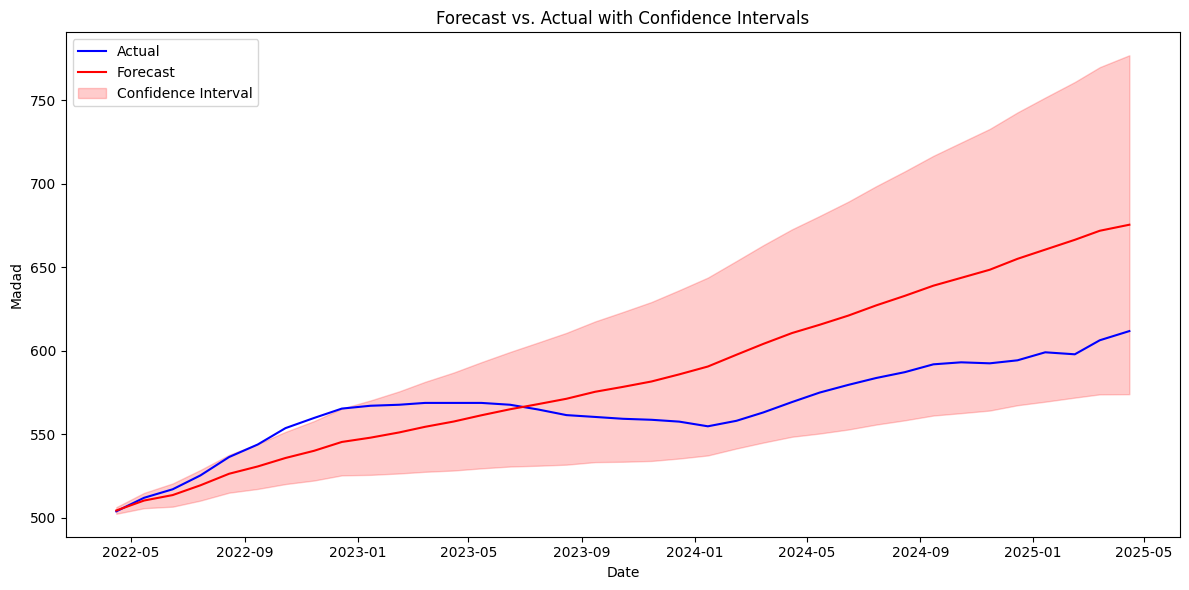

In [ ]:
import matplotlib.pyplot as plt

# ציור התחזית מול האמת
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, predictions, label='Forecast', color='red')

# רווח סמך – טווח אי-ודאות
plt.fill_between(y_test.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='red', alpha=0.2, label='Confidence Interval')

plt.title('Forecast vs. Actual with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Madad')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


משימה 8: חיזוי עתידי (אופציונלי למתקדמים)
מטרה: חיזוי לתקופה עתידית.

צור DataFrame של משתנים חיצוניים עתידיים (לדוגמה ידנית או רנדומלית).

בצע חיזוי לתקופה עתידית של 30 צעדים.

הצג את התחזית על גרף כולל פס ביטחון.

<ipython-input-18-aed626562437>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-18-aed626562437>:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


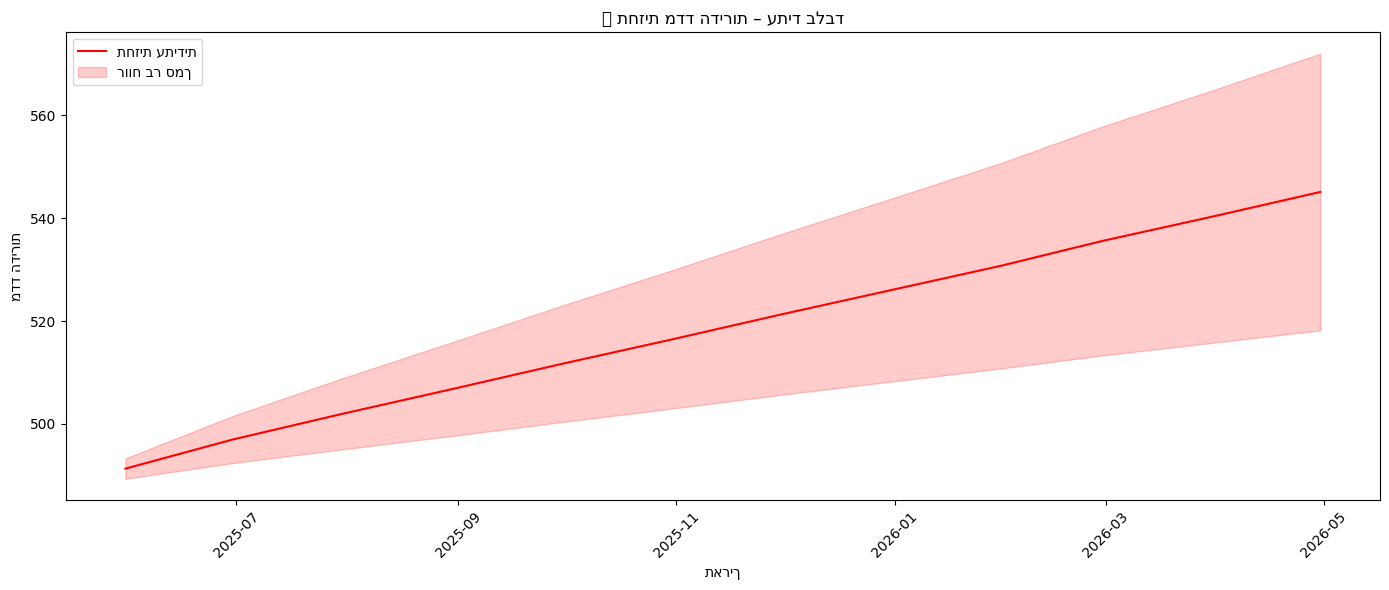

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# מספר צעדים עתידיים
future_steps = 12

# תאריכים עתידיים החל מהחודש האחרון ב-y
last_date = y.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='M')

# ממוצע המשתנים המסבירים לחיזוי עתידי
future_exog = pd.DataFrame(np.tile(exog.mean().values, (future_steps, 1)),
                           columns=exog.columns, index=future_index)

# תחזית עתידית
forecast_future = sarimax_results.get_forecast(steps=future_steps, exog=future_exog)
pred_future = forecast_future.predicted_mean
conf_future = forecast_future.conf_int()

# לוודא שהתאריכים הם האינדקס
pred_future.index = future_index
conf_future.index = future_index

# גרף תחזית עתידית עם תאריכים בציר X
plt.figure(figsize=(14, 6))
plt.plot(future_index, pred_future, label='תחזית עתידית', color='red')
plt.fill_between(future_index,
                 conf_future.iloc[:, 0],
                 conf_future.iloc[:, 1],
                 color='red', alpha=0.2, label='רווח בר סמך')

plt.title('📈 תחזית מדד הדירות – עתיד בלבד')
plt.xlabel('תאריך')
plt.ylabel('מדד הדירות')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()
